In [5]:
# sklearn.metrics : scikit-learn 패키지 중 모형평가에 사용되는 서브 패키지
# classification_report : 주요 분류 측정 항목을 보여주는 보고서 모듈
# confusion_matrix : 분류의 정확성을 평가하기 위한 오차행렬 계산 모듈
from sklearn.metrics import classification_report, confusion_matrix

# sklearn.model_selection : scikit-learn 패지 중 클래스를 나눌 때 함수를 통해 train/test를 나눌 때, 모델 검증에 사용되는 패키지
# train_test_split : 배열 또는 행렬을 임의의 훈련(train) 및 테스트(test) 하위 집합으로 분할하는 모듈
from sklearn.model_selection import train_test_split

# sklearn.tree : scikit-learn 패키지 중 분류(Classification) 및 회귀(Regression)를 위한 의사결정 트리기반 모델이 있는 서브 패키지
# DecisionTreeClassifier : 의사결정 트리 분류 모듈
from sklearn.tree import DecisionTreeClassifier

# sklearn : 기계학습(Machine Learning) 관련 패키지
# tree : 분류(Classification) 및 회귀(Regression)를 위한 의사결정 트리 기반 모듈
from sklearn import tree

# IPython.display : IPython 내에 정보를 보여주는 도구용 공용 API 
# Image : raw 데이터가 있는 PNG, JPEG 이미지 객체를 만드는 모듈
from IPython.display import Image

import numpy as np
import pandas as pd

# pydotplus : 그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
# !pip install pydotplus
import pydotplus

# os : 운영체제(Operating System)와 상호작용하기 위한 기본적인 기능(경로 생성, 변경 등)이 제공되는 모듈
import os

In [7]:
tennis_data = pd.read_csv('playtennis.csv')
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [9]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [75]:
feature_cols = tennis_data.columns[0:4]

X = tennis_data[feature_cols]
y = tennis_data.PlayTennis

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 4)
(4, 4)
(10,)
(4,)


In [76]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
dt_prediction = dt_clf.predict(X_test)

In [78]:
print(confusion_matrix(y_test, dt_prediction))

[[1 1]
 [0 2]]


In [79]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [80]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [81]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [82]:
target_name = np.array(['Play No', 'Play Yes'])

In [83]:
# dt_clf : 의사결정 트리 분류기(graphviz로 내보낼 의사결정 트리)
# out_file : 의사결정 트리를 파일 또는 문자열로 반환(기본 : tree.dot, None일 경우 문자열로 반환)
# feature_names : 각 features의 이름(문자열)
# class_names : 각 대상 class의 이름을 오름차순으로 정렬 (True일 경우 class 이름의 symbol 표현)
# filled : True 일 경우 분류를 위한 다수 클래스, 회귀 값의 극한 또는 다중 출력의 노드 순도를 나타내기 위해 노드를 색칠
# rounded : True 일 경우 둥근 모서리가 있는 노드 상자를 그리고, Times-Roman 대신 Helvetica 글꼴 사용
# special_characters : True 일 경우 특수 문자 표시
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [84]:
# Pydotplus 모듈 중 Dot 형식의 데이터로 정의된 그래프를 로드(load)하는 함수인
# graph_from_dot_data()에 변수 dt_dot_data를 입력한 후 변수 dt_graph에 저장
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

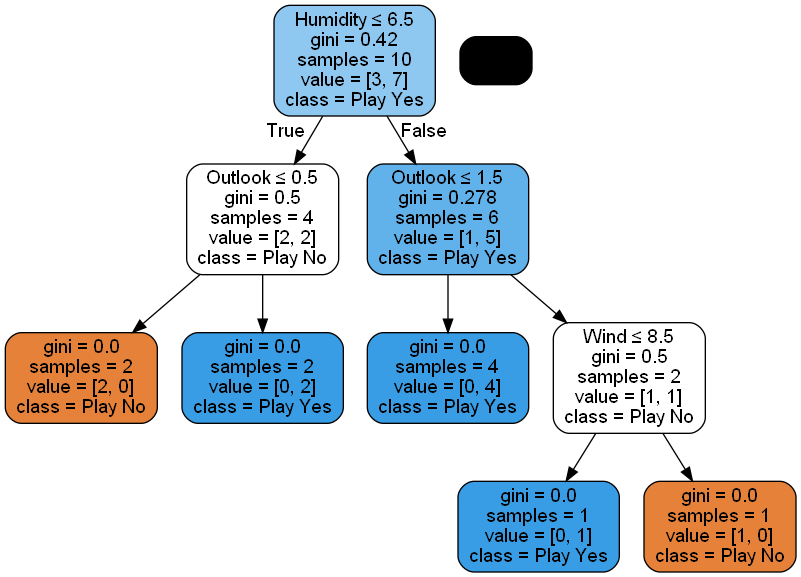

In [86]:
# 변수 dt_graph에 대한 정보를 png파일로 생성하는 함수 create_png()를 사용한 후,
# 이미지 객체를 만드는 Image 모듈을 통해 그래프 표현
Image(dt_graph.create_png())